<a href="https://colab.research.google.com/github/myforkedrepositories/WOSplus/blob/master/test_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WOSplus tests:
If run from your environment, install wosplus with
```
# pip install wosplus
```

In [ ]:
import os

In [ ]:
FROM_REPO=True
if not FROM_REPO and os.getcwd()=='/content':
    !pip install wosplus > /dev/null
    os.mkdir('tmp')
    os.chdir('tmp')

In [ ]:
# Check if colaboratory was launched and install missing requirements
if os.getcwd()=='/content':
    ! pip install openpyxl xlrd unidecode python-levenshtein requests_testadapter venn > /dev/null
    ! git clone https://github.com/colav/WOSplus.git > /dev/null
    os.chdir('WOSplus')

In [1]:
import wosplus
from venn import draw_venn, generate_colors
import numpy as np

In [2]:
%%writefile drive.cfg
[FILES]
Sample_WOS.xlsx = 1--LJZ4mYyQcaJ93xBdbnYj-ZzdjO2Wq2
Sample_SCI.xlsx = 1-3a-hguQTk5ko8JRLCx--EKaslxGVscf
Sample_SCP.xlsx = 1-IAWlMdp2U-9L2jvZUio04ub1Ym3PX-H

Overwriting drive.cfg


In [3]:
cib=wosplus.wosplus('drive.cfg')
#cib.Debug=True
cib.load_biblio('Sample_WOS.xlsx')
cib.load_biblio('Sample_SCI.xlsx',prefix='SCI')
cib.load_biblio('Sample_SCP.xlsx',prefix='SCP')

print('before merge: {}'.format( cib.WOS.shape[0]+cib.SCI.shape[0]+cib.SCP.shape[0] )  )

before merge: 49


Step by step

In [4]:
cib.merge(left="WOS", right="SCI", left_DOI="DI", left_TI="TI", 
          left_extra_journal="SO", left_author="AU", left_year="PY",
          right_DOI="SCI_DI", right_TI="SCI_TI", right_extra_journal="SCI_SO", 
          right_author="SCI_AU", right_year="SCI_PY")

if True:
    print('intial: {}'.format( cib.WOS.shape[0]+cib.SCI.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCI.shape) )

cib.merge(left="WOS_SCI", right="SCP", left_DOI="DI", left_TI="TI", 
               left_extra_journal="SO", left_author="AU", left_year="PY",
               right_DOI="SCP_DOI", right_TI="SCP_Title", 
               right_extra_journal="SCP_Source title", right_author="SCP_Authors",
               right_year="SCP_Year")

if True:
    print('intial: {}'.format( cib.WOS_SCI.shape[0]+cib.SCP.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCI_SCP.shape) )

.

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


intial: 39
final : (29, 96)
.intial: 39
final : (30, 139)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Single step

In [5]:
cib.mergeall()

..

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


before merge: 48
.intial: 38
final : (28, 96)
..intial: 38
final : (30, 142)

{'001': 15, '010': 1, '011': 4, '100': 1, '101': 2, '110': 1, '111': 6}


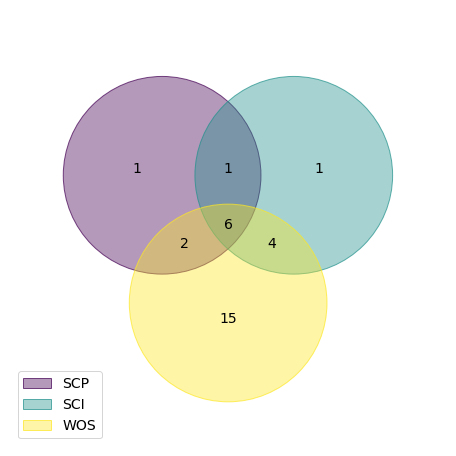

In [6]:
labels=["SCP","SCI","WOS"]

petal_labels={}
petal_labels["001"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "WOS"].shape[0]
petal_labels["010"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "SCI"].shape[0]
petal_labels["011"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "WOS_SCI"].shape[0]
petal_labels["100"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "SCP"].shape[0]
petal_labels["101"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "WOS_SCP"].shape[0]
petal_labels["110"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "SCI_SCP"].shape[0]
petal_labels["111"] = cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "WOS_SCI_SCP"].shape[0]
print(petal_labels)
draw_venn(
    petal_labels=petal_labels, dataset_labels=labels,
    hint_hidden=False, colors=generate_colors(n_colors=3),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)


<Figure size 288x288 with 0 Axes>

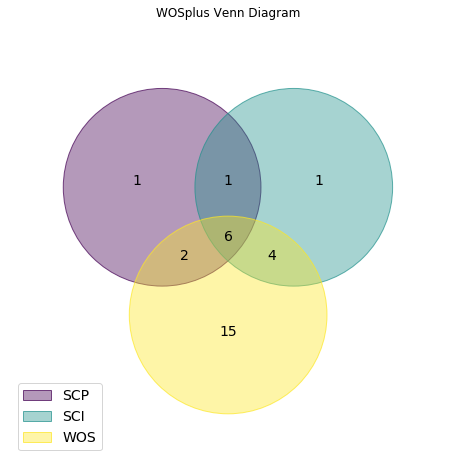

In [7]:
cib.plot_sets()

### In progress... Other database

In [ ]:
cib.load_biblio('Sample_SCP.xlsx',prefix='NEW')

In [ ]:
cib.merge(left='WOS_SCI_SCP',right='NEW',right_DOI='NEW_DOI',
            right_TI='NEW_Title',
            right_extra_journal='NEW_Source title',
            right_author='NEW_Authors',
            right_year='NEW_Year')

In [ ]:
cib.WOS.shape

In [ ]:
for i in ["WOS","SCI","SCP","WOS_SCI","WOS_SCP","SCI_SCP","WOS_SCI_SCP"]:
    VAL=cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == i]
    print(VAL.shape,i)


In [ ]:
print(cib.type)

In [ ]:
cib.WOS_SCI_SCP[cib.WOS_SCI_SCP.Tipo == "SCP"].shape[0]